### https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/
### https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
### https://machinelearningmastery.com/introduction-to-eigendecomposition-eigenvalues-and-eigenvectors/
### https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/

### https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/
### https://machinelearningmastery.com/introduction-to-matrix-decompositions-for-machine-learning/
### https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/
### https://machinelearningmastery.com/lstm-autoencoders/

### https://towardsdatascience.com/dimensionality-reduction-with-autoencoders-versus-pca-f47666f80743

In [1]:
#!pip install plotly

# PCA

In [2]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

# define matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)

# calculate the mean of each column
M = mean(A.T, axis=1)
print(M)

# center columns by substracting columns means
C = A - M
print(C)

# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)

# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)

# If all eigenvalues have a similar value, \
# then we know that the existing representation may already be reasonably compressed 
# or dense and that the projection may offer little.
# If there are eigenvalues close to zero, they represent components or axes of B that may be discarded.

# project data
P = vectors.T.dot(C.T)
print(P.T)

# Interestingly, we can see that only the first eigenvector is required,
# suggesting that we could project our 3×2 matrix onto a 3×1 matrix with little loss.

[[1 2]
 [3 4]
 [5 6]]
[3. 4.]
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]
[[4. 4.]
 [4. 4.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


In [3]:
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA

# define matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(A)
# acces values and vectors
print(pca.components_)
print(pca.explained_variance_)
# transform data
B = pca.transform(A)
print(B)

# Eigenvalues are coefficients applied to eigenvectors that give the vectors their length or magnitude.
# For example, a negative eigenvalue may reverse the direction of the eigenvector as part of scaling it.

[[1 2]
 [3 4]
 [5 6]]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[8. 0.]
[[-2.82842712e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00  2.22044605e-16]]


In [4]:
# eigendecomposition
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)
# calculate eigendecomposition
values, vectors = eig(A)
print(values)
print(vectors)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


In [5]:
# confirm first eigenvector
B = A.dot(vectors[:, 0])
print(B)
C = vectors[:, 0] * values[0]
print(C)

# The example multiplies the original matrix with the first eigenvector and compares it to the first eigenvector
# multiplied by the first eigenvalue.

[ -3.73863537  -8.46653421 -13.19443305]
[ -3.73863537  -8.46653421 -13.19443305]


In [6]:
from numpy.linalg import inv
from numpy import diag
# create matrix from eigenvectors
Q = vectors
print(Q, '\n')
# create inverse of eigenvectors matrix
R = inv(Q)
print(R, '\n')
# create diagonal matrix from eigenvalues
L = diag(values)
print(L, '\n')
# reconstruct the original matrix
B = Q.dot(L).dot(R)
print(B, '\n')

[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]] 

[[-0.48295226 -0.59340999 -0.70386772]
 [-0.91788599 -0.24901003  0.41986593]
 [ 0.40824829 -0.81649658  0.40824829]] 

[[ 1.61168440e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.11684397e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.30367773e-15]] 

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]] 



In [7]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=20, n_informative=15, n_redundant=5, random_state=7)
print(X.shape, y.shape)

(20, 20) (20,)


In [8]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [9]:
X, y = make_classification(n_samples=2000, n_informative=15, n_redundant=5, random_state=7)

In [10]:
steps = [('pca', PCA(n_components=15)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [11]:
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.879 (0.020)


In [12]:
model.fit(X, y)

Pipeline(steps=[('pca', PCA(n_components=15)), ('m', LogisticRegression())])

In [13]:
# make a single prediction
row = [[0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


In [14]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [15]:
# get dataset
def get_dataset():
    """
    """
    X, y = make_classification(
        n_samples=1000,
        n_features=20,
        n_informative=15,
        n_redundant=5,
        random_state=7
    )
    
    return X, y

In [16]:
# get a list of models to evaluate
def get_models():
    """
    """
    models = dict()
    
    for i in range(1, 21):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    
    return models

In [17]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    """
    """
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

    return scores

In [18]:
X, y = get_dataset()
models = get_models()

results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.542 (0.048)
>2 0.713 (0.048)
>3 0.720 (0.053)
>4 0.723 (0.051)
>5 0.725 (0.052)
>6 0.730 (0.046)
>7 0.805 (0.036)
>8 0.800 (0.037)
>9 0.814 (0.036)
>10 0.816 (0.034)
>11 0.819 (0.035)
>12 0.819 (0.038)
>13 0.819 (0.035)
>14 0.853 (0.029)
>15 0.865 (0.027)
>16 0.865 (0.027)
>17 0.865 (0.027)
>18 0.865 (0.027)
>19 0.865 (0.027)
>20 0.865 (0.027)


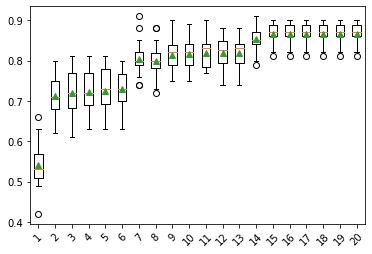

In [19]:
# plot model performace for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

# Manifold learning

LLE: 0.087 sec
LTSA: 0.15 sec
Hessian LLE: 0.22 sec
Modified LLE: 0.18 sec
Isomap: 0.4 sec
MDS: 2.7 sec
SE: 0.053 sec


C:\Users\KonuTech\.conda\envs\tf-gpu\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\KonuTech\.conda\envs\tf-gpu\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


t-SNE: 2.5 sec


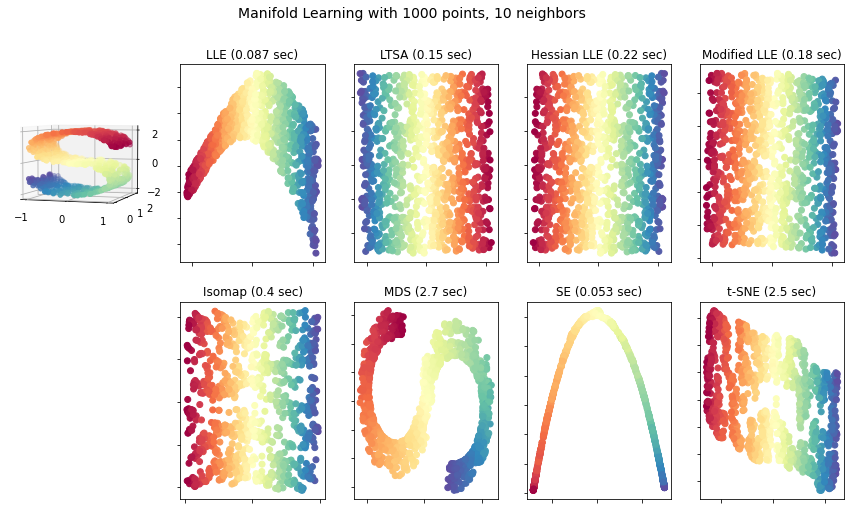

In [20]:
# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle(
    "Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14
)

# Add 3d scatter plot
ax = fig.add_subplot(251, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods
LLE = partial(
    manifold.LocallyLinearEmbedding,
    n_neighbors=n_neighbors,
    n_components=n_components,
    eigen_solver="auto",
)

methods = OrderedDict()
methods["LLE"] = LLE(method="standard")
methods["LTSA"] = LLE(method="ltsa")
methods["Hessian LLE"] = LLE(method="hessian")
methods["Modified LLE"] = LLE(method="modified")
methods["Isomap"] = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
methods["MDS"] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods["SE"] = manifold.SpectralEmbedding(
    n_components=n_components, n_neighbors=n_neighbors
)
methods["t-SNE"] = manifold.TSNE(n_components=n_components, init="pca", random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

plt.show()

LLE: 0.085 sec
LTSA: 0.13 sec
Hessian LLE: 0.22 sec
Modified LLE: 0.18 sec
Isomap: 0.39 sec
MDS: 2 sec
SE: 0.047 sec


C:\Users\KonuTech\.conda\envs\tf-gpu\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\KonuTech\.conda\envs\tf-gpu\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


t-SNE: 4.5 sec


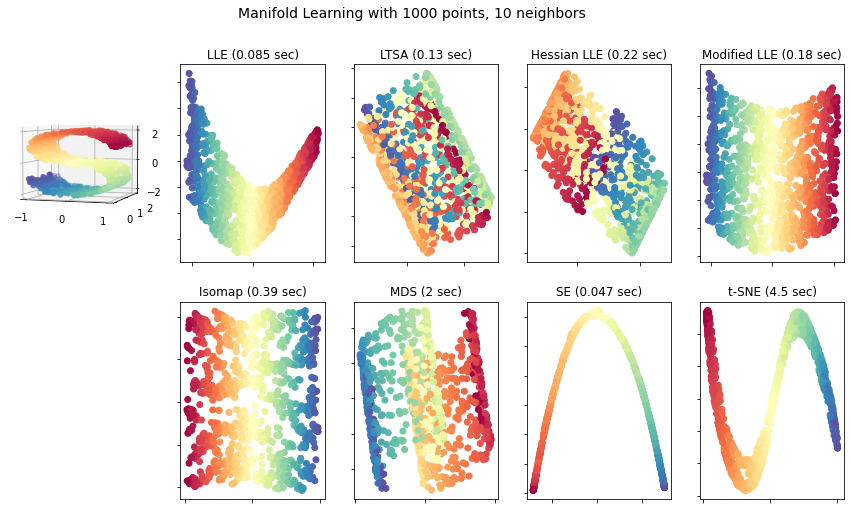

In [21]:
# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 3

# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle(
    "Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14
)

# Add 3d scatter plot
ax = fig.add_subplot(251, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods
LLE = partial(
    manifold.LocallyLinearEmbedding,
    n_neighbors=n_neighbors,
    n_components=n_components,
    eigen_solver="auto",
)

methods = OrderedDict()
methods["LLE"] = LLE(method="standard")
methods["LTSA"] = LLE(method="ltsa")
methods["Hessian LLE"] = LLE(method="hessian")
methods["Modified LLE"] = LLE(method="modified")
methods["Isomap"] = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
methods["MDS"] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods["SE"] = manifold.SpectralEmbedding(
    n_components=n_components, n_neighbors=n_neighbors
)
methods["t-SNE"] = manifold.TSNE(n_components=n_components, init="pca", random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

plt.show()

# Autoencoders vs PCA

### https://towardsdatascience.com/dimensionality-reduction-with-autoencoders-versus-pca-f47666f80743

https://github.com/AndC314/LV_PCA_NN

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [23]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected = True)

In [24]:
# generate data
X, y = datasets.make_classification(
    n_samples=10000,
    n_features=50,
    n_redundant=10,
    n_informative=10,
    random_state=1,
    n_clusters_per_class=2,
    n_classes=3,
    class_sep=2
)

In [25]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-7.587418,-1.318339,0.918936,-0.542261,-0.576430,5.747208,-2.809245,0.564334,0.045349,-7.536093,...,0.353336,12.699721,-17.549600,1.088717,-3.106827,-0.214737,-0.046240,1.263314,-1.130216,-6.322584
1,-0.341249,-0.479760,-0.783092,-1.432838,1.099651,4.666494,0.613648,-1.639972,0.715798,2.599124,...,-0.174772,-6.530727,1.898639,-0.184209,-2.035756,-1.037868,-0.932127,-0.555611,1.041343,-4.295018
2,3.311034,0.093849,3.649525,-0.084012,-0.442772,-3.988959,0.733877,-0.912848,-1.294269,-4.135253,...,-0.546270,5.910842,0.115553,7.978106,1.095661,-1.108076,-0.849619,1.091005,-1.938760,6.138702
3,-4.894117,-0.214629,4.334940,0.667853,1.631404,3.409002,-3.411577,0.035906,2.241101,-6.190118,...,-0.698168,16.553667,-15.244204,0.544588,-5.197464,0.370703,0.957696,2.094867,1.618053,-5.095930
4,2.050728,0.155685,-8.458231,-0.185724,-1.033617,2.204071,0.319013,0.622104,-0.702450,-0.843583,...,1.092734,-4.017586,2.131073,4.787024,4.430674,0.599103,0.985190,-1.720278,0.979140,3.646177


In [26]:
pd.DataFrame(y).head()

,0
0,0
1,1
2,2
3,0
4,2


In [27]:
# divide data in Train - Validation - Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

In [28]:
# Standardize Data
sc = StandardScaler()
X_tr_std = sc.fit_transform(X_tr)
X_valid_std = sc.transform(X_valid)
X_test_std = sc.transform(X_test)

In [30]:
encoder = keras.models.Sequential([
    keras.layers.Dense(3, input_shape=[50])
])

decoder = keras.models.Sequential([
    keras.layers.Dense(50, input_shape=[3])
])

autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=0.1))

autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 3)                 153       
_________________________________________________________________
sequential_4 (Sequential)    (None, 50)                200       
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


C:\Users\KonuTech\.conda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [31]:
history = autoencoder.fit(
    X_tr_std,
    X_tr_std,
    epochs=100,
    validation_data=(X_valid_std, X_valid_std),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)

codings = encoder.predict(X_tr_std)

Epoch 1/100
175/175 [==============================] - 1s 3ms/step - loss: 0.9579 - val_loss: 0.8384
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 0.8128 - val_loss: 0.7816
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 0.7772 - val_loss: 0.7569
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 0.7607 - val_loss: 0.7479
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 0.7551 - val_loss: 0.7452
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 0.7534 - val_loss: 0.7442
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 0.7527 - val_loss: 0.7440
Epoch 8/100
175/175 [==============================] - 0s 2ms/step - loss: 0.7525 - val_loss: 0.7443
Epoch 9/100
175/175 [==============================] - 0s 2ms/step - loss: 0.7524 - val_loss: 0.7442
Epoch 10/100
175/175 [==============================] - 0s 2ms/step - loss: 0.7524 - val_lo

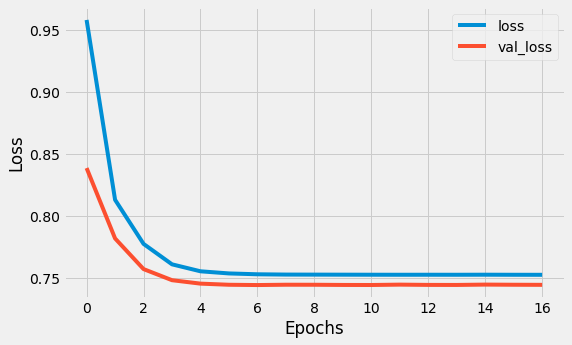

In [32]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylabel('Loss')
plt.xlabel('Epochs');

In [33]:
codings = encoder.predict(X_tr_std)

In [34]:
codings

array([[ 1.013744  ,  0.8133011 ,  2.4682186 ],
       [-2.2132027 , -4.7890277 , -0.74980384],
       [-1.6012833 ,  2.0602021 ,  1.7844563 ],
       ...,
       [-1.6623505 ,  1.8001161 , -0.65063906],
       [ 1.5042769 ,  1.1164597 , -0.9835525 ],
       [-0.2913086 ,  1.2231134 ,  1.0265306 ]], dtype=float32)

In [35]:
graph = go.Scatter3d(
    x= codings[:,0],
    y= codings[:,1],
    z= codings[:,2],
    mode='markers',
    marker=dict(
        color = y_tr, 
        size= 2,
        line=dict(
            color= y_tr,
            width= 12
        ),
        opacity=0.3
    )
)
data = [graph]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
        xaxis = dict(title  = 'E0'),
        yaxis = dict(title  = 'E1'),
        zaxis = dict(title  = 'E2')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

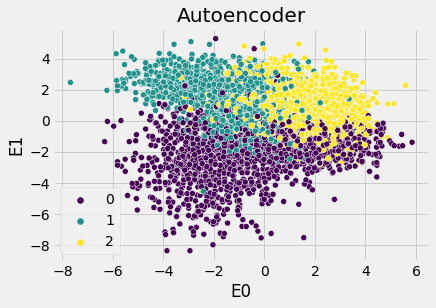

In [36]:
sns.scatterplot(x=codings[:,0], y=codings[:,1], hue=y_tr, palette='viridis')
plt.xlabel(f'E0')
plt.ylabel(f'E1')
plt.title(f'Autoencoder');

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=n_components,svd_solver='auto')
scores = pca.fit_transform(X_tr_std) # u

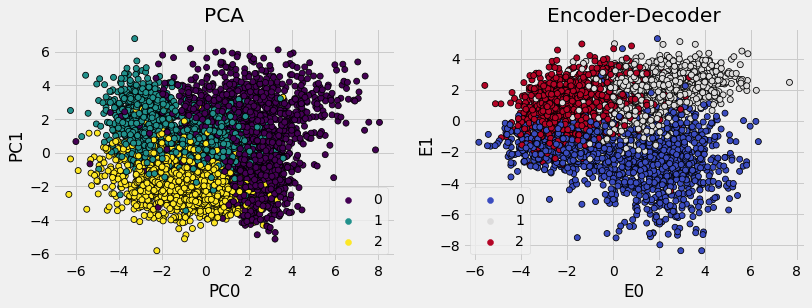

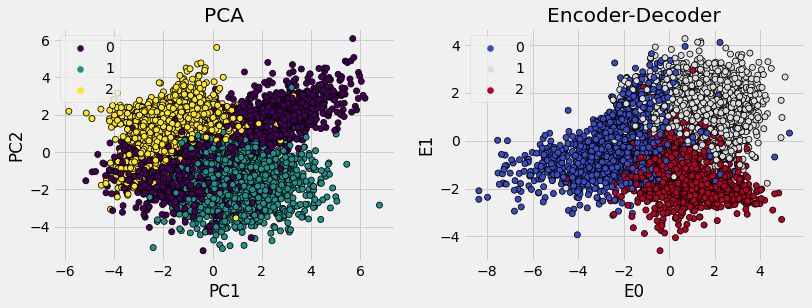

In [39]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores[:,0],y=scores[:,1], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.subplot(1,2,2)
sns.scatterplot(x=-codings[:,0], y=codings[:,1], hue=y_tr, palette='coolwarm', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.xlabel('E0')
plt.ylabel('E1')
plt.title('Encoder-Decoder');
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores[:,1],y=scores[:,2], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(1,2,2)
sns.scatterplot(x=codings[:,1], y=codings[:,2], hue=y_tr, palette='coolwarm', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.title('Encoder-Decoder')
plt.xlabel('E0')
plt.ylabel('E1');

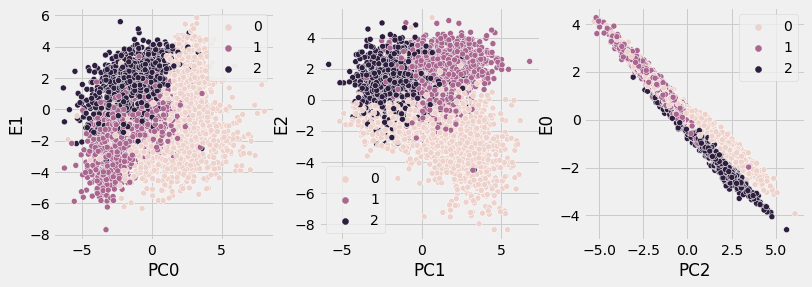

In [40]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.scatterplot(x=scores[:,0], y=codings[:,0], hue=y_tr)
plt.xlabel('PC0')
plt.ylabel('E1')
plt.subplot(1,3,2)
sns.scatterplot(x=scores[:,1], y=codings[:,1], hue=y_tr)
plt.xlabel('PC1')
plt.ylabel('E2')
plt.subplot(1,3,3)
sns.scatterplot(x=scores[:,2], y=codings[:,2], hue=y_tr)
plt.xlabel('PC2')
plt.ylabel('E0');

In [41]:
codings_train = encoder.predict(X_tr_std)
codings_test = encoder.predict(X_test_std)
scores_train = pca.transform(X_tr_std)
scores_test = pca.transform(X_test_std)

In [42]:
codings_train

array([[ 1.013744  ,  0.8133011 ,  2.4682186 ],
       [-2.2132027 , -4.7890277 , -0.74980384],
       [-1.6012833 ,  2.0602021 ,  1.7844563 ],
       ...,
       [-1.6623505 ,  1.8001161 , -0.65063906],
       [ 1.5042769 ,  1.1164597 , -0.9835525 ],
       [-0.2913086 ,  1.2231134 ,  1.0265306 ]], dtype=float32)

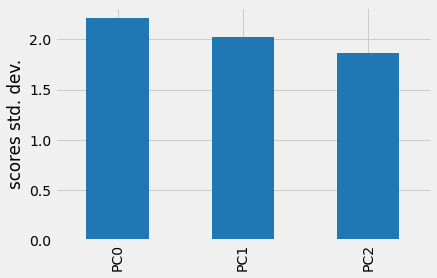

In [43]:
pd.DataFrame(scores_train, columns=['PC'+str(i) for i in range(pca.n_components_)]).std().plot(kind='bar', color='tab:blue')
plt.ylabel('scores std. dev.');

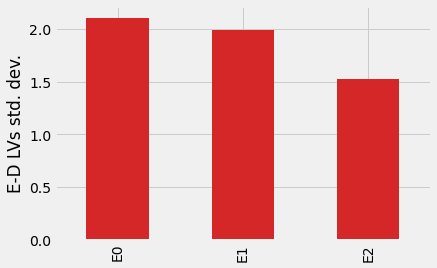

In [44]:
pd.DataFrame(codings_train, columns=['E'+str(i) for i in range(int(scores.shape[1]))]).std().plot(kind='bar', color='tab:red')
plt.ylabel('E-D LVs std. dev.');

<AxesSubplot:>

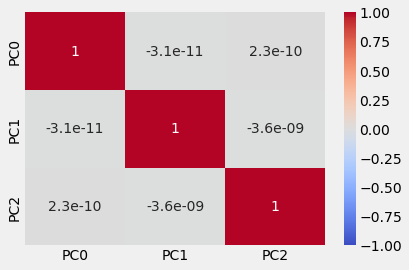

In [53]:
sns.heatmap(pd.DataFrame(scores_train, columns=['PC'+str(i) for i in range(pca.n_components_)]).corr(), vmin=-1, vmax=+1, cmap='coolwarm', annot=True)

<AxesSubplot:>

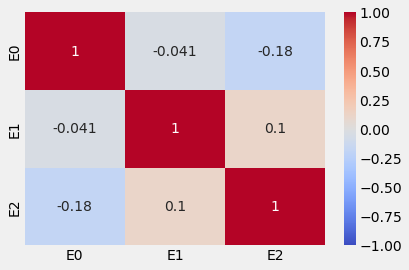

In [55]:
sns.heatmap(pd.DataFrame(codings_train, columns=['E'+str(i) for i in range(scores.shape[1])]).corr(), vmin=-1, vmax=+1, cmap='coolwarm', annot=True)

(0.8, 1.0)

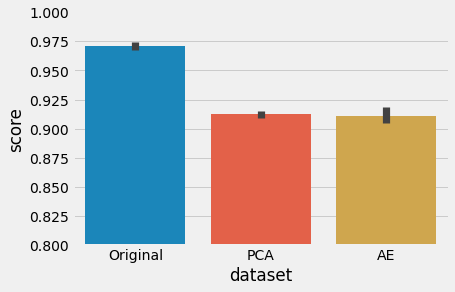

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=200, max_depth=5, n_jobs=-1)

labels = ['Original', 'PCA','AE']
scores = pd.DataFrame(columns=labels)
scores['PCA'] = cross_val_score(rfc, scores_train, y_tr, cv=5)
scores['AE'] = cross_val_score(rfc, codings_train, y_tr, cv=5)
scores['Original'] = cross_val_score(rfc, X_tr_std, y_tr, cv=5)

sns.barplot(x='dataset', y='score', data = scores.melt(value_name='score', var_name='dataset'))
plt.ylim(0.8, 1)

In [65]:
st_encoder = keras.models.Sequential([
    keras.layers.Dense(20, input_shape=[50]),
    keras.layers.Dense(15),
    keras.layers.Dense(3),
])

st_decoder = keras.models.Sequential([
    keras.layers.Dense(15, input_shape=[3]),
    keras.layers.Dense(20),
    keras.layers.Dense(50),
])

st_autoencoder = keras.models.Sequential([st_encoder, st_decoder])
st_autoencoder.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=0.1))
st_autoencoder.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_10 (Sequential)   (None, 3)                 1383      
_________________________________________________________________
sequential_11 (Sequential)   (None, 50)                1430      
Total params: 2,813
Trainable params: 2,813
Non-trainable params: 0
_________________________________________________________________


C:\Users\KonuTech\.conda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [66]:
history = st_autoencoder.fit(
    X_tr_std,
    X_tr_std,
    epochs=500,
    validation_data=(X_valid_std,X_valid_std),
    callbacks=[keras.callbacks.EarlyStopping(patience=30)],
    verbose=1
)

Epoch 1/500
175/175 [==============================] - 1s 4ms/step - loss: 0.9093 - val_loss: 0.8118
Epoch 2/500
175/175 [==============================] - 1s 3ms/step - loss: 0.7847 - val_loss: 0.7579
Epoch 3/500
175/175 [==============================] - 1s 3ms/step - loss: 0.7596 - val_loss: 0.7483
Epoch 4/500
175/175 [==============================] - 1s 3ms/step - loss: 0.7552 - val_loss: 0.7462
Epoch 5/500
175/175 [==============================] - 1s 3ms/step - loss: 0.7538 - val_loss: 0.7452
Epoch 6/500
175/175 [==============================] - 1s 3ms/step - loss: 0.7533 - val_loss: 0.7450
Epoch 7/500
175/175 [==============================] - 1s 3ms/step - loss: 0.7530 - val_loss: 0.7451
Epoch 8/500
175/175 [==============================] - 1s 3ms/step - loss: 0.7529 - val_loss: 0.7446
Epoch 9/500
175/175 [==============================] - 1s 3ms/step - loss: 0.7528 - val_loss: 0.7446
Epoch 10/500
175/175 [==============================] - 1s 3ms/step - loss: 0.7528 - val_lo

175/175 [==============================] - 1s 3ms/step - loss: 0.7523 - val_loss: 0.7443
Epoch 82/500
175/175 [==============================] - 1s 3ms/step - loss: 0.7522 - val_loss: 0.7443


In [67]:
st_codings_train = st_encoder.predict(X_tr_std)
st_codings_test = st_encoder.predict(X_test_std)

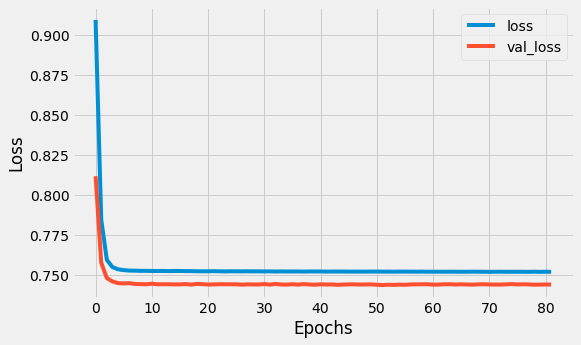

In [68]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylabel('Loss')
plt.xlabel('Epochs');

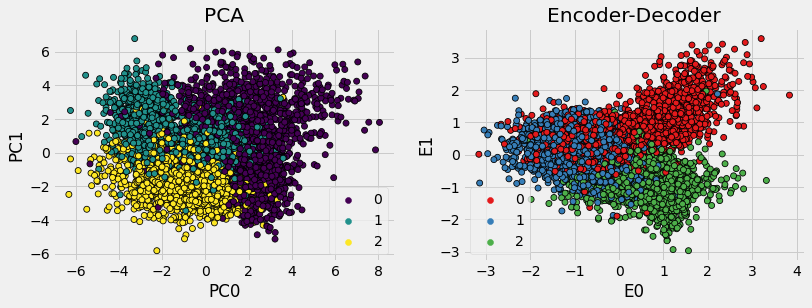

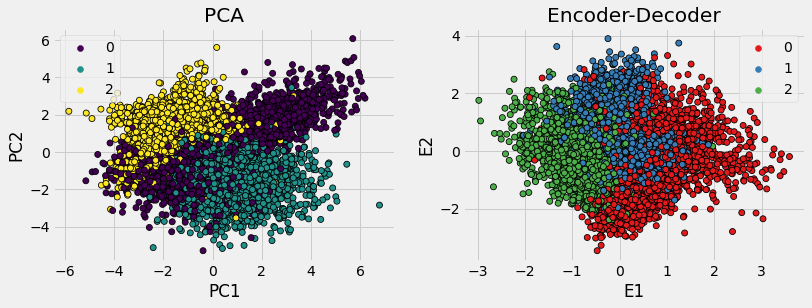

In [69]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores_train[:,0],y=scores_train[:,1], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.subplot(1,2,2)
sns.scatterplot(x=-st_codings_train[:,0], y=st_codings_train[:,1], hue=y_tr, palette='Set1', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.xlabel('E0')
plt.ylabel('E1')
plt.title('Encoder-Decoder');
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=scores_train[:,1],y=scores_train[:,2], hue=y_tr, palette='viridis', edgecolor='k', linewidth=0.8) #size=scores[:,2], sizes=(10,100), 
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(1,2,2)
sns.scatterplot(x=st_codings_train[:,1], y=st_codings_train[:,2], hue=y_tr, palette='Set1', edgecolor='k', linewidth=0.8) #size=codings[:,2], sizes=(10,100), 
plt.title('Encoder-Decoder')
plt.xlabel('E1')
plt.ylabel('E2');

In [70]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=5)
rfc.fit(st_codings_train,y_tr)
rfc.score(st_codings_train,y_tr), rfc.score(st_codings_test,y_test)

(0.9192857142857143, 0.913)

(0.8, 1.0)

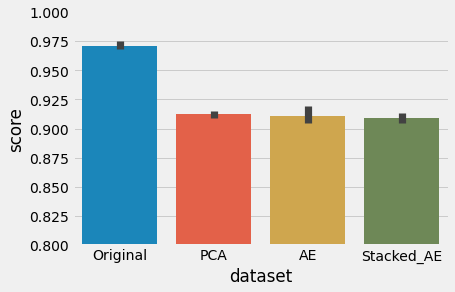

In [74]:
scores['Stacked_AE'] = cross_val_score(rfc, st_codings_train, y_tr, cv=5, n_jobs=-1)
sns.barplot(x='dataset', y='score', data = scores.melt(value_name='score', var_name='dataset'))
plt.ylim(0.8, 1)

In [75]:
nl_st_encoder = keras.models.Sequential([
    keras.layers.Dense(20, input_shape=[50], activation='relu'),
    keras.layers.Dense(15, activation='selu'),
    keras.layers.Dense(3, activation='selu'),
])

nl_st_decoder = keras.models.Sequential([
    keras.layers.Dense(15, input_shape=[3], activation='selu'),
    keras.layers.Dense(20, activation='selu'),
    keras.layers.Dense(50, activation='relu'),
])

nl_st_autoencoder = keras.models.Sequential([nl_st_encoder, nl_st_decoder])
nl_st_autoencoder.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=1, decay=1e-4))
nl_st_autoencoder.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_13 (Sequential)   (None, 3)                 1383      
_________________________________________________________________
sequential_14 (Sequential)   (None, 50)                1430      
Total params: 2,813
Trainable params: 2,813
Non-trainable params: 0
_________________________________________________________________


C:\Users\KonuTech\.conda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [76]:
history = nl_st_autoencoder.fit(X_tr_std,X_tr_std, epochs=500,validation_data=(X_valid_std,X_valid_std),
                         callbacks=[keras.callbacks.EarlyStopping(patience=10)],verbose=1)

Epoch 1/500
175/175 [==============================] - 1s 6ms/step - loss: 0.9162 - val_loss: 0.8783
Epoch 2/500
175/175 [==============================] - 1s 3ms/step - loss: 0.8783 - val_loss: 0.8701
Epoch 3/500
175/175 [==============================] - 1s 3ms/step - loss: 0.8726 - val_loss: 0.8681
Epoch 4/500
175/175 [==============================] - 1s 3ms/step - loss: 0.8699 - val_loss: 0.8640
Epoch 5/500
175/175 [==============================] - 1s 4ms/step - loss: 0.8677 - val_loss: 0.8626
Epoch 6/500
175/175 [==============================] - 1s 4ms/step - loss: 0.8656 - val_loss: 0.8591
Epoch 7/500
175/175 [==============================] - 1s 4ms/step - loss: 0.8631 - val_loss: 0.8572
Epoch 8/500
175/175 [==============================] - 1s 4ms/step - loss: 0.8616 - val_loss: 0.8576
Epoch 9/500
175/175 [==============================] - 1s 4ms/step - loss: 0.8598 - val_loss: 0.8551
Epoch 10/500
175/175 [==============================] - 1s 4ms/step - loss: 0.8583 - val_lo

175/175 [==============================] - 1s 5ms/step - loss: 0.8415 - val_loss: 0.8416
Epoch 82/500
175/175 [==============================] - 1s 4ms/step - loss: 0.8416 - val_loss: 0.8417
Epoch 83/500
175/175 [==============================] - 1s 4ms/step - loss: 0.8414 - val_loss: 0.8417
Epoch 84/500
175/175 [==============================] - 1s 4ms/step - loss: 0.8414 - val_loss: 0.8407
Epoch 85/500
175/175 [==============================] - 1s 5ms/step - loss: 0.8414 - val_loss: 0.8408
Epoch 86/500
175/175 [==============================] - 1s 4ms/step - loss: 0.8413 - val_loss: 0.8419
Epoch 87/500
175/175 [==============================] - 1s 4ms/step - loss: 0.8413 - val_loss: 0.8407
Epoch 88/500
175/175 [==============================] - 1s 4ms/step - loss: 0.8412 - val_loss: 0.8413
Epoch 89/500
175/175 [==============================] - 1s 4ms/step - loss: 0.8412 - val_loss: 0.8420
Epoch 90/500
175/175 [==============================] - 1s 5ms/step - loss: 0.8410 - val_loss: 

In [77]:
nl_st_codings_train = nl_st_encoder.predict(X_tr_std)
nl_st_codings_test = nl_st_encoder.predict(X_test_std)

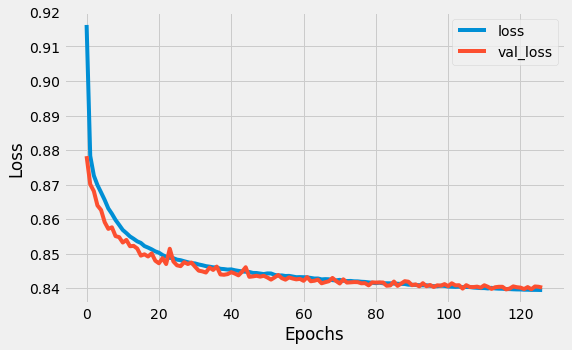

In [78]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylabel('Loss')
plt.xlabel('Epochs');

In [80]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=5)
rfc.fit(nl_st_codings_train,y_tr)
rfc.score(nl_st_codings_train,y_tr), rfc.score(nl_st_codings_test,y_test)

(0.9608928571428571, 0.953)

(0.8, 1.0)

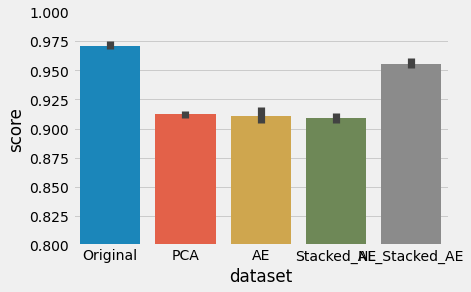

In [81]:
scores['NL_Stacked_AE'] = cross_val_score(rfc, nl_st_codings_train, y_tr, cv=5, n_jobs=-1)
sns.barplot(x='dataset', y='score', data = scores.melt(value_name='score', var_name='dataset'))
plt.ylim(0.8, 1)